Daily Challenge: Analysis of Airplane Crashes and Fatalities

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data_airplane = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin-1')

data cleaning

In [8]:
df = pd.DataFrame(data_airplane)

data = data.drop(columns='other_fuel3')
# Imputing missing values based on data distribution, data type, and relevance
# For numerical columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
# For categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Converting relevant columns to appropriate data types
# Example: data['column_name'] = pd.to_numeric(data['column_name'], errors='coerce')
detailed_summary = data.describe(include='all')
# Print column names to verify
print("Column Names:", data.columns)
# Ensure only numeric columns are used for correlation
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_matrix

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [10]:
missing_value = df.isnull().sum()
missing_value

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

In [11]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [12]:
df.describe()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4980.000000,4769.000000,4772.000000,4990.000000,4756.000000,4757.000000,4956.000000
mean,31.195984,27.009017,4.479254,22.373547,19.053827,3.578516,1.719128
std,45.534788,44.111609,3.483859,35.061741,34.146127,3.167922,55.540273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


In [23]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\rickia\AppData\Local\Temp\ipykernel_22180\2825656407.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\rickia\AppData\Local\Temp\ipykernel_22180\2825656407.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [24]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\rickia\AppData\Local\Temp\ipykernel_22180\4072275310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [25]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,-,Demonstration,Wright Flyer III,19,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,15:00,"Juvisy-sur-Orge, France",Aeroflot,-,Air show,Wright Byplane,SC1,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,-,Test flight,Dirigible,19,1,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,15:00,"Victoria, British Columbia, Canada",Private,-,Training,Curtiss seaplane,19,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,-,Training,Zeppelin L-1 (airship),19,1,20.0,12.0,4.0,14.0,8.0,3.0,0.0,The airship flew into a thunderstorm and encou...


In [26]:
detailed_summary = df.describe(include='all')
detailed_summary

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
count,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998
unique,4570,1060,4122,2264,880,3825,2463,4689,3818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4839
top,8/31/1988,15:00,"Moscow, Russia",Aeroflot,-,Training,Douglas DC-3,19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crashed under unknown circumstances.
freq,4,1550,21,265,3705,870,348,277,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.141257,26.321329,4.457583,22.355342,18.518607,3.550620,1.704682,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.461818,43.203147,3.405622,35.036614,33.393452,3.093069,55.306594,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,29.000000,5.000000,25.000000,20.000000,5.000000,0.000000,NaN


In [28]:
# Conversion des dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [29]:
detailed_summary = df.describe()
detailed_summary

,Date,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4998,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,1971-07-04 09:31:37.238895528,31.141257,26.321329,4.457583,22.355342,18.518607,3.550620,1.704682
min,1908-09-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1951-06-15 06:00:00,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,1970-11-27 00:00:00,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,1992-06-06 18:00:00,35.000000,29.000000,5.000000,25.000000,20.000000,5.000000,0.000000
max,2023-11-01 00:00:00,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000
std,NaN,45.461818,43.203147,3.405622,35.036614,33.393452,3.093069,55.306594


In [30]:
print("Column Names:", df.columns)

Column Names: Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary'],
      dtype='object')


In [31]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
Aboard,1.000000,0.989446,0.605163,0.740196,0.741175,0.321041,0.020334
Aboard Passangers,0.989446,1.000000,0.559700,0.735795,0.748262,0.280010,0.019047
Aboard Crew,0.605163,0.559700,1.000000,0.480174,0.434471,0.759890,0.034920
Fatalities,0.740196,0.735795,0.480174,1.000000,0.987594,0.574159,0.032359
Fatalities Passangers,0.741175,0.748262,0.434471,0.987594,1.000000,0.512261,0.030299
Fatalities Crew,0.321041,0.280010,0.759890,0.574159,0.512261,1.000000,0.044047
Ground,0.020334,0.019047,0.034920,0.032359,0.030299,0.044047,1.000000


Analysez la fréquence des accidents au fil du temps pour identifier les tendances.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, t

convertir 'Date' en years

In [33]:
df['year'] = df['Date'].dt.year
crashes_per_year = df['year'].value_counts().sort_index()
crashes_per_year

year
1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2019    13
2020     8
2021     9
2022     6
2023     4
Name: count, Length: 113, dtype: int64

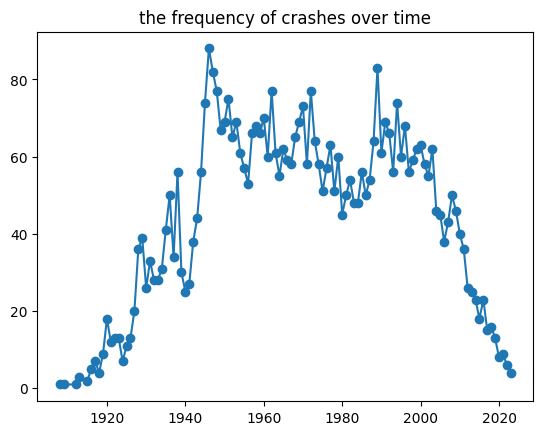

In [35]:
plt.plot(crashes_per_year.index, crashes_per_year.values, marker="o") 
plt.title("the frequency of crashes over time")
plt.show()

3. Analyse statistique :

Apply SciPy to analyze the distribution of fatalities and survival rates;Calculate key statistics like mean, median, and standard deviation.

etablir 1 variable "survival_rates" = "nbr de personnes à bord"-"nombre de personnes décédées

In [ ]:
df_survival = df[]

In [ ]:
mean_output = data.groupby('....')['......'].mean()
median_output = data.groupby('....')['....'].median()
std_output = data.groupby('....')['....'].std()

In [ ]:
mean_output
median_output
std_output

Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).

2 groupes;mean pour les 2 grp; calcul stats t; compare avec critical value

In [36]:
from scipy.stats import ttest_ind

# Calculate standard deviation
std_a = np.std(group_a_scores, ddof=1)
std_b = np.std(group_b_scores, ddof=1)

# Perform T-test
t_stat, p_val = ttest_ind(group_a_scores, group_b_scores)

In [38]:
goupe_1 = df[df['year'] < 1990]['Fatalities']
goupe_2 = df[df['year'] > 1990]['Fatalities']
t_stat, p_val = ttest_ind(goupe_1, goupe_2)

In [41]:
print(f"T-statistic: {t_stat},\n P-value: {p_val}")

T-statistic: -3.003550651901448,
 P-value: 0.0026818811755787574


In [42]:
if p_val < 0.05:
    print("Il y a une différence significative entre les deux périodes.")
else:
    print("Aucune différence significative trouvée.")

Il y a une différence significative entre les deux périodes.


visualisation

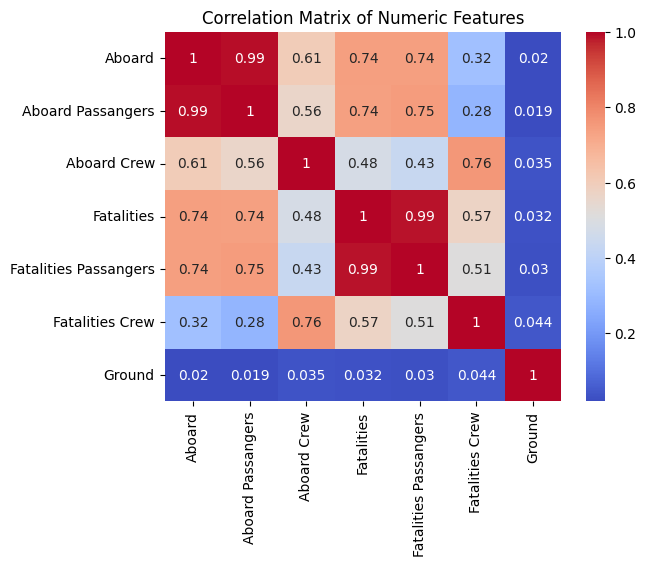

In [43]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

graphiques de séries chronologiques d’accidents au fil des ans

histogramme de décés

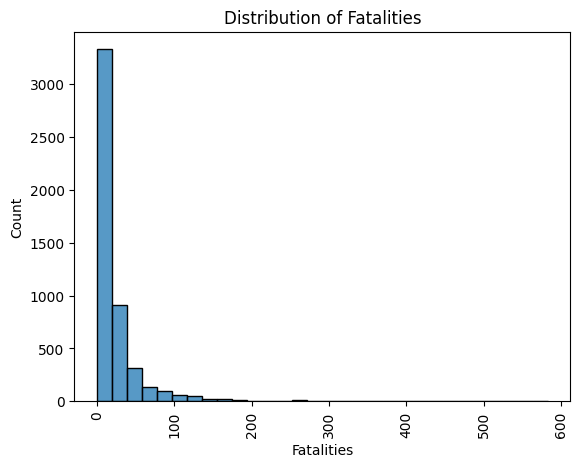

In [49]:
sns.histplot(df['Fatalities'], bins=30)
plt.title('Distribution of Fatalities')
plt.xticks(rotation=90)
plt.show()